# 멜론 음원차트 Top 100 데이터 수집
- 순위, 노래제목, 가수명

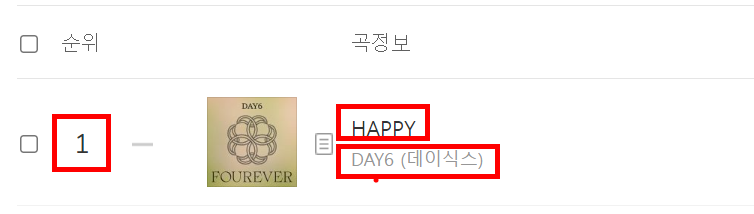

In [39]:
import pandas as pd
import requests as req
from bs4 import BeautifulSoup as bs

# 사용자(브라우저)가 요청했다는 정보를 서버에서 확인할 수 있게 User-Agent 속성 설정 !
header_options = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36'
}

In [43]:
melon_url = 'https://www.melon.com/chart/'
res = req.get(melon_url, headers = header_options)
html = bs(res.text, 'lxml')

In [44]:
res

<Response [200]>

In [45]:
html

<!DOCTYPE html>
<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>멜론차트&gt;TOP100&gt;멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" name="naver-site-verification"/>
<meta content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" name="google-site-verification"/>
<meta content="357952407588971" property="fb:app_id"/>
<meta content="Melon" property="og:title"/>
<meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
<meta content="음악이 필요한 순간, 멜론" property="og:description"/>
<meta content="http://www.melon.com/chart/" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="멜론" property="og:sit

In [46]:
ranks = html.select('tbody span.rank')
songNms = html.select('div.rank01 a')
singers = html.select('div.rank02 > span')

len(ranks), len(songNms), len(singers)

(100, 100, 100)

In [47]:
rank_list = []
songNm_list = []
singer_list = []

for i in range(len(ranks)):
    rank_list.append(ranks[i].text)
    songNm_list.append(songNms[i].text)
    singer_list.append(singers[i].text)

In [48]:
# 엑셀 형태로 저장까지 할 것!
# pandas가 필요하므로 import 먼저 진행

melon_dic = {'순위':rank_list, '곡명':songNm_list, '아티스트':singer_list}
melon_dic

{'순위': ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '49',
  '50',
  '51',
  '52',
  '53',
  '54',
  '55',
  '56',
  '57',
  '58',
  '59',
  '60',
  '61',
  '62',
  '63',
  '64',
  '65',
  '66',
  '67',
  '68',
  '69',
  '70',
  '71',
  '72',
  '73',
  '74',
  '75',
  '76',
  '77',
  '78',
  '79',
  '80',
  '81',
  '82',
  '83',
  '84',
  '85',
  '86',
  '87',
  '88',
  '89',
  '90',
  '91',
  '92',
  '93',
  '94',
  '95',
  '96',
  '97',
  '98',
  '99',
  '100'],
 '곡명': ['HAPPY',
  'Welcome to the Show',
  '녹아내려요',
  'Supernova',
  '한 페이지가 될 수 있게',
  '클락션 (Klaxon)',
  '소나기',
  'Small girl (feat. 도경수(D.O.))',
  'How Sweet',
  '예뻤어',
  'Sticky',
  '사랑은 늘 도망가',
  

In [49]:
melon_df = pd.DataFrame(melon_dic)
melon_df

,순위,곡명,아티스트
0,1,HAPPY,DAY6 (데이식스)
1,2,Welcome to the Show,DAY6 (데이식스)
2,3,녹아내려요,DAY6 (데이식스)
3,4,Supernova,aespa
4,5,한 페이지가 될 수 있게,DAY6 (데이식스)
...,...,...,...
95,96,Live My Life,aespa
96,97,Love Lee,AKMU (악뮤)
97,98,꿈,태연 (TAEYEON)
98,99,플러팅,황인욱


In [50]:
melon_df.to_excel('멜론차트 TOP100.xlsx', index=False)